# Table Of Content
1. [Imports](#Imports)
1. [Previewing data](#Previewing-data)
1. [Data_Manager](#Data_Manager)
    1. [New Features](#New-Feature-Creation)
1. [Visual-analysis](#Visual-analysis)
1. [Distribution-analisys](#Distribution-analisys)
1. [Data-Transformation-analysis](#Data-Transformation-analysis)
    1. [Notebook with TrAnls](btc_eda_skw_investigation.ipynb)
1. [Train-Test-split](#Train-Test-split)

# Imports

In [8]:
import os, sys
import pandas as pd
import seaborn as sns

sys.path.insert(0, "./classes/")
import cls_data

In [9]:
# reloading functions without runtime.restart
import importlib
importlib.reload(cls_data)

<module 'cls_data' from './classes/cls_data.py'>

# Previewing data

In [10]:
dir_path = "../data/csv_numeric_sources/"

In [11]:
# this is for Linux
!ls -lagh {dir_path}

# this is for Windows
# ! dir "../data/"

total 1.6M
drwxrwxrwx 1 1000  512 Jun  9 15:55 .
drwxrwxrwx 1 1000  512 Jun  9 15:55 ..
-rwxrwxrwx 1 1000 126K Jun  9 15:55 BCHAIN-AVBLS.csv
-rwxrwxrwx 1 1000 113K Jun  9 15:55 BCHAIN-CPTRA.csv
-rwxrwxrwx 1 1000 123K Jun  9 15:55 BCHAIN-HRATE.csv
-rwxrwxrwx 1 1000 105K Jun  9 15:55 BCHAIN-MIREV.csv
-rwxrwxrwx 1 1000 105K Jun  9 15:55 BCHAIN-MKTCP.csv
-rwxrwxrwx 1 1000  79K Jun  9 15:55 BCHAIN-MWNTD.csv
-rwxrwxrwx 1 1000  87K Jun  9 15:55 BCHAIN-MWNUS.csv
-rwxrwxrwx 1 1000  95K Jun  9 15:55 BCHAIN-MWTRV.csv
-rwxrwxrwx 1 1000  97K Jun  9 15:55 BCHAIN-NTRAT.csv
-rwxrwxrwx 1 1000  97K Jun  9 15:55 BCHAIN-TOTBC.csv
-rwxrwxrwx 1 1000 114K Jun  9 15:55 BCHAIN-TOUTV.csv
-rwxrwxrwx 1 1000  98K Jun  9 15:55 BCHAIN-TRFEE.csv
-rwxrwxrwx 1 1000 104K Jun  9 15:55 BCHAIN-TRVOU.csv
-rwxrwxrwx 1 1000 233K Jun  8 06:32 BTC-RatesHistData.csv
-rwxrwxrwx 1 1000 2.7K Jun  8 06:32 files_properties.csv


## Data_Manager

### Init DataManager, previewing BTC data

In [13]:
pd.read_csv(os.path.join(dir_path, "BTC-RatesHistData.csv"))[:5]

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 06, 2021","36,281.40","35,518.70","36,434.00","35,421.50",96.98K,2.14%
1,"Jun 05, 2021","35,520.00","36,841.20","37,887.60","34,832.00",101.48K,-3.61%
2,"Jun 04, 2021","36,851.30","39,191.40","39,255.40","35,659.90",127.71K,-5.96%
3,"Jun 03, 2021","39,187.30","37,555.70","39,462.30","37,193.60",106.44K,4.34%
4,"Jun 02, 2021","37,555.80","36,687.70","38,199.90","35,981.10",96.89K,2.37%


In [14]:
btc_exch_rates_filename = "BTC-RatesHistData.csv"
data_manager = cls_data.DataManager(dir_path=dir_path, btc_exch_rates_filename=btc_exch_rates_filename)

#### New FeaturesCreation

In [18]:
# Adding new useful features

# BTC_MINED_PDAY
data_manager.feature_calculate(fn=lambda X: -X.diff(), 
                               fn_prop=dict(new_feature_name="BTC_MINED_PDAY", base_feat_name='TOTBC'))
# VOL_CHANGE_PDAY
data_manager.feature_calculate(fn=lambda X: -X.diff(), 
                               fn_prop=dict(new_feature_name="VOL_CHANGE_PDAY", base_feat_name='Vol'))

# MWNUS_CH_PDAY
data_manager.feature_calculate(fn=lambda X: -X.diff(), 
                                 fn_prop=dict(base_feat_name="MWNUS", new_feature_name="MWNUS_CH_PDAY"))

# NTRAT_CH_PDAY
data_manager.feature_calculate(fn=lambda X: -X.diff(), 
                                 fn_prop=dict(base_feat_name="NTRAT", new_feature_name="NTRAT_CH_PDAY"))

True

### Features Meaning

In [24]:
data_manager.data_btc.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol', 'Growth', 'AVBLS', 'CPTRA',
       'HRATE', 'MIREV', 'MKTCP', 'MWNTD', 'MWNUS', 'MWTRV', 'NTRAT', 'TOTBC',
       'TOUTV', 'TRFEE', 'TRVOU', 'BTC_MINED_PDAY', 'VOL_CHANGE_PDAY',
       'MWNUS_CH_PDAY', 'NTRAT_CH_PDAY'],
      dtype='object')

In [44]:
data_manager.data_files_prop

,Unnamed: 0,FileName,Meaning,url,csv_url
0,1,BCHAIN-AVBLS.csv,Bitcoin Average Block Size,https://www.quandl.com/data/BCHAIN/AVBLS-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
1,2,BCHAIN-HRATE.csv,Bitcoin Hash Rate,https://www.quandl.com/data/BCHAIN/HRATE-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
2,3,BCHAIN-MIREV.csv,Bitcoin Miners Revenue,https://www.quandl.com/data/BCHAIN/MIREV-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
3,4,BCHAIN-MWNTD.csv,Bitcoin My Wallet Number of Transaction Per Day,https://www.quandl.com/data/BCHAIN/MWNTD-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
4,5,BCHAIN-TOTBC.csv,Total Bitcoins in Circulation,https://www.quandl.com/data/BCHAIN/TOTBC-Total...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
5,6,BCHAIN-CPTRA.csv,Bitcoin Cost Per Transaction,https://www.quandl.com/data/BCHAIN/CPTRA-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
6,7,BCHAIN-TRVOU.csv,Bitcoin USD Exchange Trade Volume,https://www.quandl.com/data/BCHAIN/TRVOU-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
7,8,BCHAIN-MWTRV.csv,Bitcoin My Wallet Transaction Volume,https://www.quandl.com/data/BCHAIN/MWTRV-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
8,9,BCHAIN-MWNUS.csv,Bitcoin My Wallet Number of Users,https://www.quandl.com/data/BCHAIN/MWNUS-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...
9,10,BCHAIN-TRFEE.csv,Bitcoin Total Transaction Fees,https://www.quandl.com/data/BCHAIN/TRFEE-Bitco...,https://www.quandl.com/api/v3/datasets/BCHAIN/...


## Visual analysis

## Price of Bitcoin in 2021

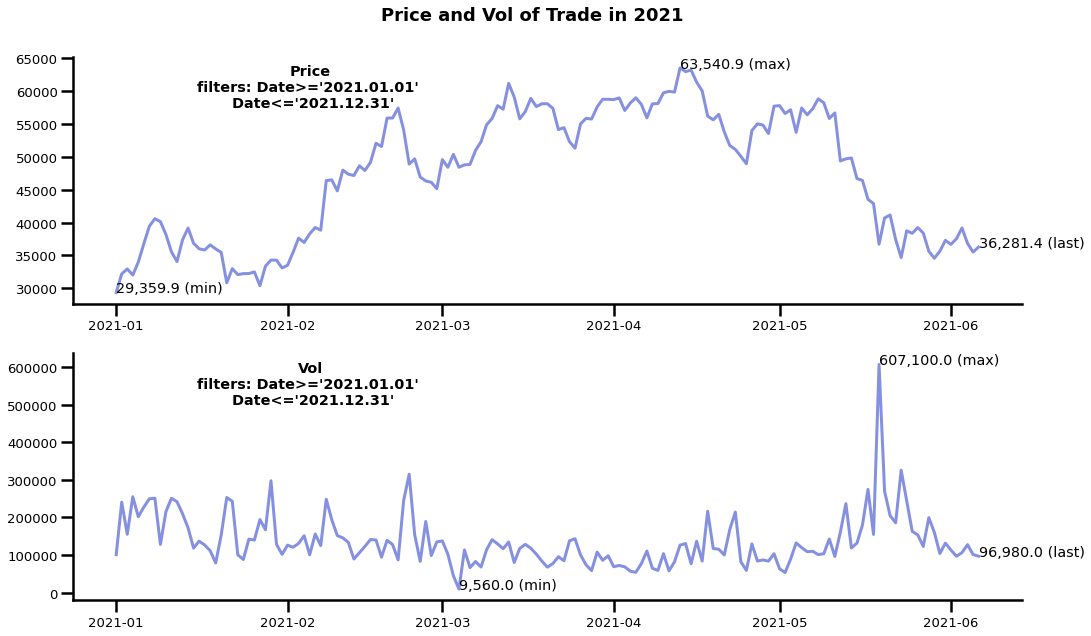

In [45]:
data_manager.plt_plot_multiple_ts(features_to_plt=['Price', 'Vol'], 
                                     titles=dict(fig_title="Price and Vol of Trade in 2021", 
                                            xy=[0.25, .77], 
                                            xy_suptitle=[0.5,.95]), 
                                     tot_figsize=(17,10),
                                     filters=["Date>='2021.01.01'", "Date<='2021.12.31'"], annotate=True)

### Tesla's impact on BTC Price in 2021

let's check how the February Bitcoin boom (i.e. Tesla's purchase of 1B Bitcoin in Feb 08, 2021 and all the hype trades that followed it) influenced price of bitcoin <br>

Articles by the subject: <br>
[[Tesla purchases 1B of BTC]](https://www.cnbc.com/2021/02/08/tesla-buys-1point5-billion-in-bitcoin.html) <br>
[[February chronology]](https://markets.businessinsider.com/currencies/news/bitcoin-price-analysis-february-recap-record-setting-cryptocurrency-2021-2-1030131679)

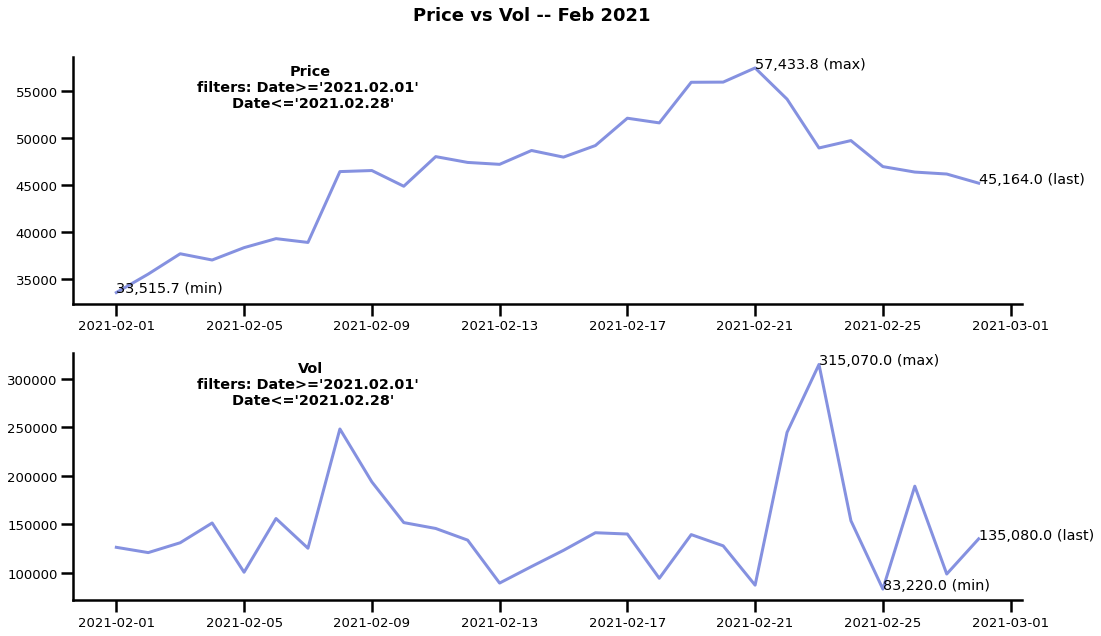

In [46]:
data_manager.plt_plot_multiple_ts(features_to_plt=['Price', 'Vol'], 
                                     titles=dict(fig_title="Price vs Vol -- Feb 2021", 
                                            xy=[0.25, .77], 
                                            xy_suptitle=[0.5,.95]), 
                                     tot_figsize=(17,10),
                                     filters=["Date>='2021.02.01'", "Date<='2021.02.28'"], annotate=True)

So yes, we definitely see the correlation between purchase of Tesla and BTC price jumping up

### Price jump up in 2013
Articles:<br>
[[one person caused BTC to spike]](https://www.cnbc.com/2018/01/23/one-person-caused-bitcoin-to-spike-from-150-to-1000-in-2013.html) <br>[[further thoughts article]](https://techcrunch.com/2018/01/15/researchers-finds-that-one-person-likely-drove-bitcoin-from-150-to-1000/)

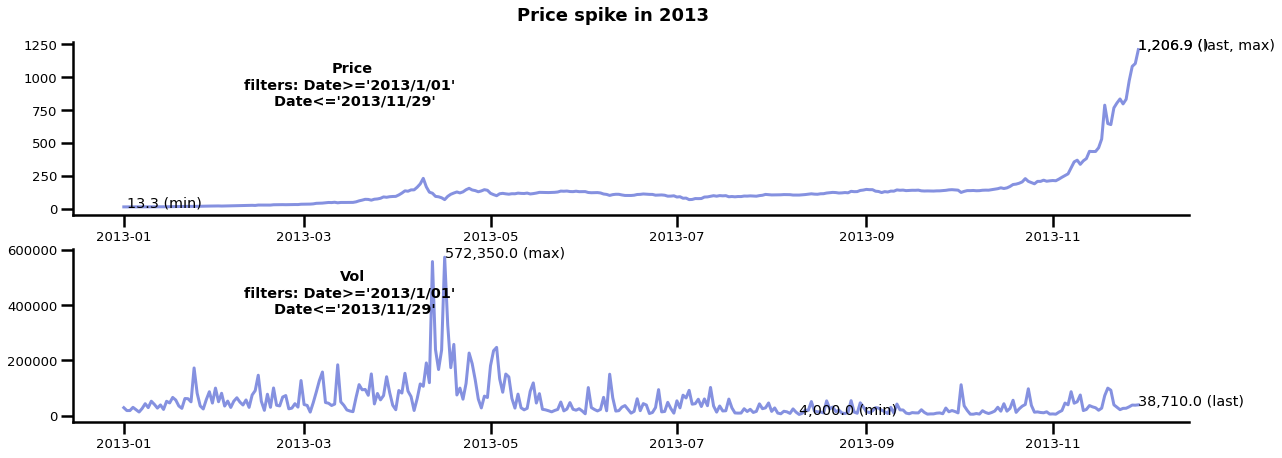

In [47]:
year_s = 2013; year_f = 2013
month_s = 1; month_f = 11
data_manager.plt_plot_multiple_ts(features_to_plt=["Price", "Vol"], 
                                     filters=[f"Date>='{year_s}/{month_s}/01'", f"Date<='{year_f}/{month_f}/29'"],
                                     titles=dict(xy=[.25,.6], fig_title="Price spike in 2013"), 
                                     annotate=True,
                                     tot_figsize=(20,7))

# Distribution analisys

## Distribution

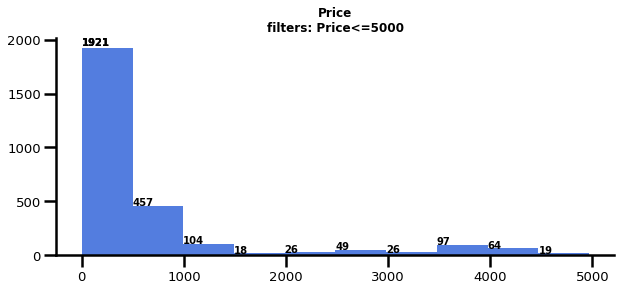

In [48]:
data_manager.plt_hist("Price", bins=10, filters=["Price<=5000"])

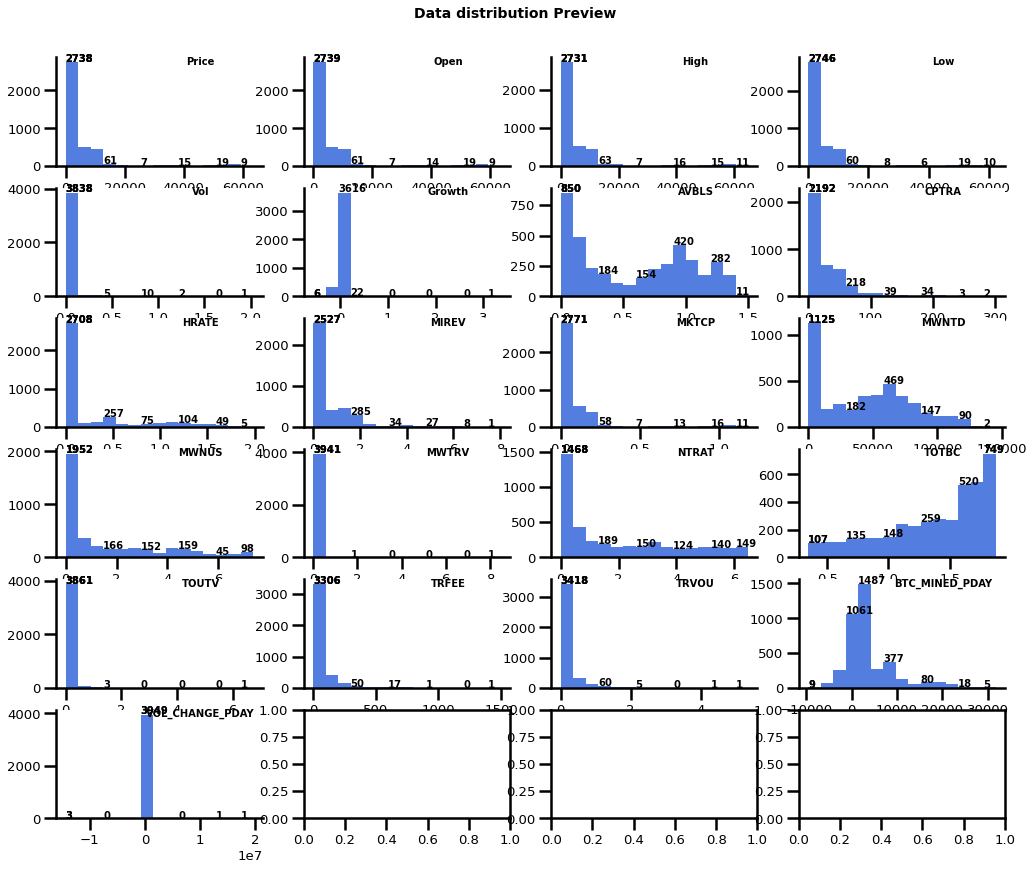

In [49]:
data_manager.plt_hist_grid(figsize=(17,14), bins=15, y=.88, x=.70, ann_fontsize=10)

* all features, exept TOTBTC are highly skewed to the right (positive skw). TOTBTC is skewd to the left

## Pairplot (scatterplots for each couple of features)

In [50]:
# # SR: use only if recalculating! This takes time! =)

# pp = sns.pairplot(data_manager.data_btc.sample(1000, replace=False), plot_kws=dict(marker="+", linewidth=.3));
# pp.fig.set_size_inches(25,25)

In [51]:
# pp.savefig("../data/img/pairplot_btc.png")

#### Precalculated pairplot chart; go to ../data/img/pairplot_btc.png to see in bigger scale
[[jump to img folder]](../data/img)

>>> Precalculated pairplot chart; go to ../data/img/pairplot_btc.png to see in bigger scale


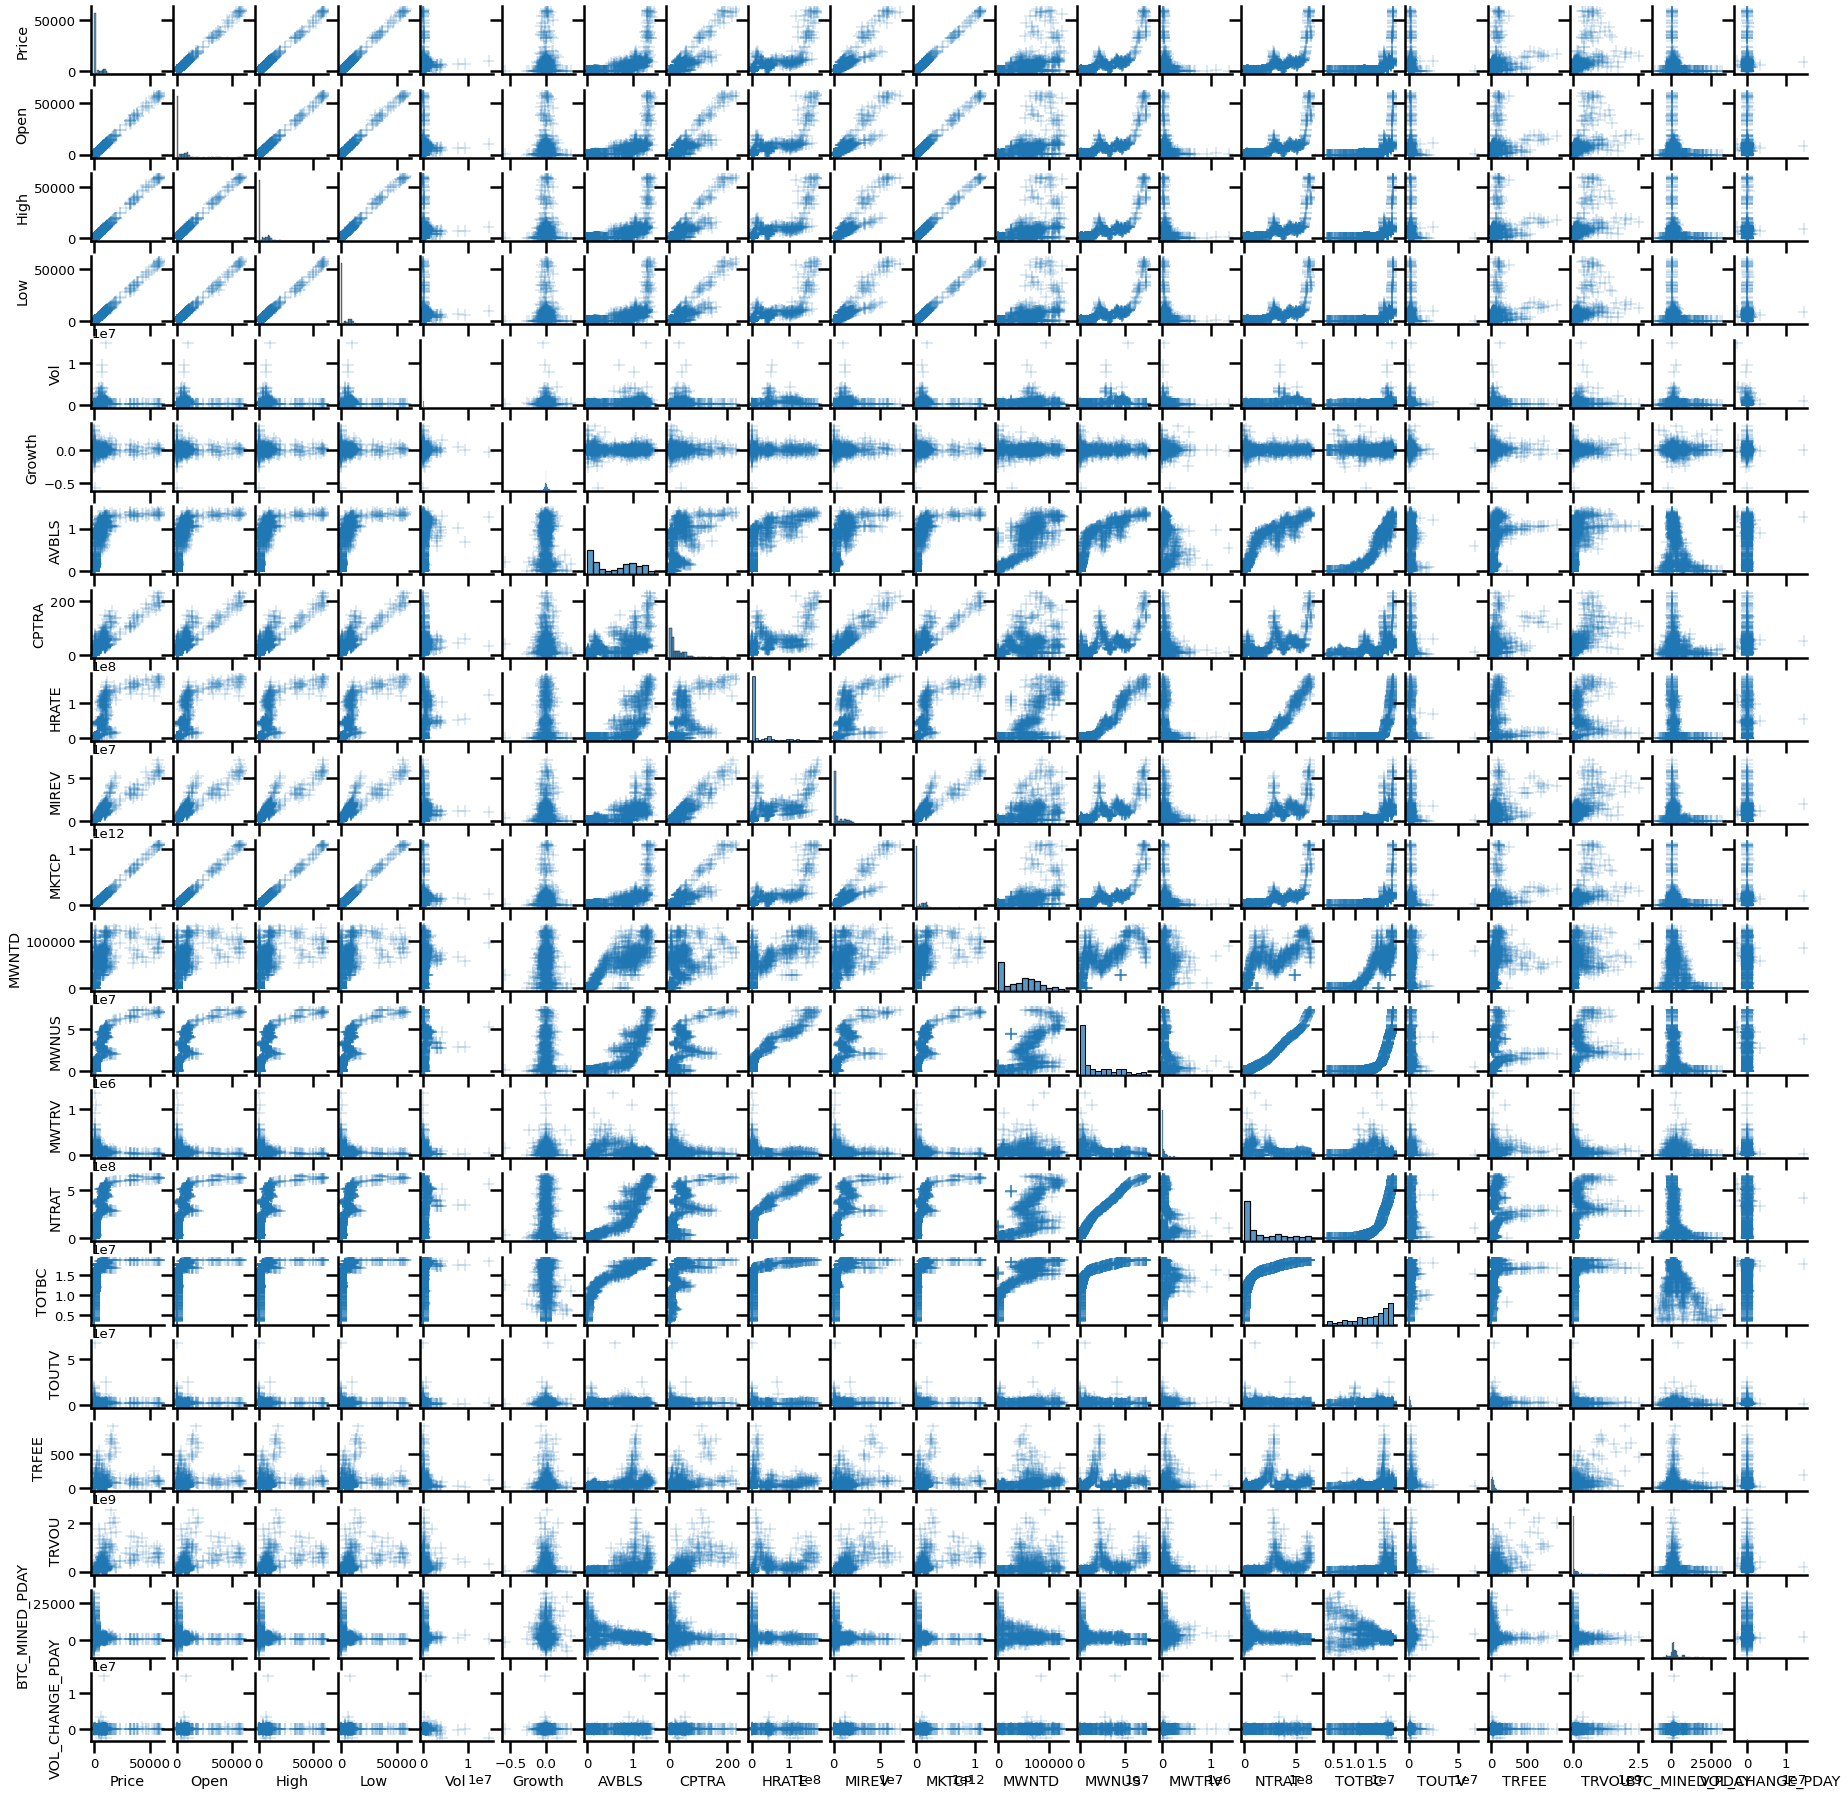

In [52]:
from IPython.display import Image

print(">>> Precalculated pairplot chart; go to ../data/img/pairplot_btc.png to see in bigger scale")

Image(filename='../data/img/pairplot_btc.png')

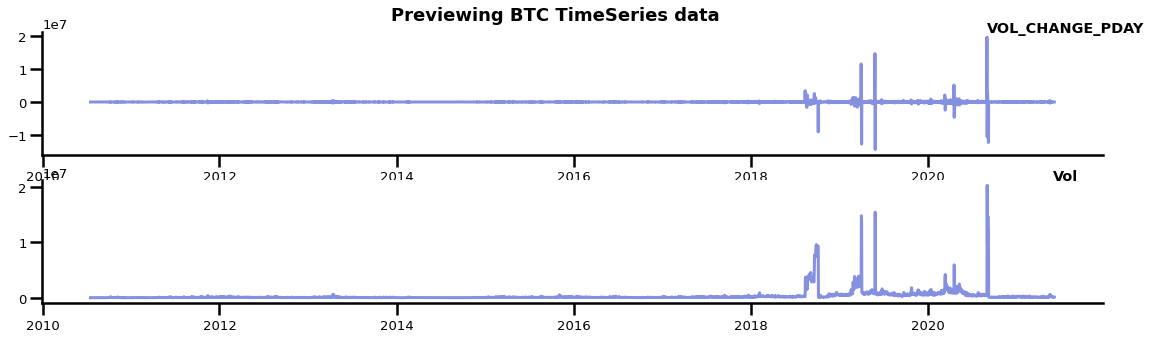

In [53]:
data_manager.plt_plot_multiple_ts(features_to_plt=["VOL_CHANGE_PDAY", "Vol"], 
                                  tot_figsize=(19,5), 
                                  titles=dict(title_loc='center', xy=[.965, .95])
                                 )

_As per Pairplot chart is is cleat that_:
* Price, Open, High, Low are linearly dependent, yet have little different pattern. 
    * as we never know the highest or lowest price of the traiding day until the day is closed
* Vol and VOL_CHANGE_PDAY are linearly dependant plus VOL_CHANGE_PDAY creates linear dependancy with all other features, so we can toss it away
* MKTCP (Market Capitalization) is also linearly dependent with Price (as it is Price * Quantity of Bictoins in Circulation),can be tossed away
* TOTBTC with BTC_MINED_PDAY describe data from different angles and have different pattern of correlation with other features, so both should be left

_Also it is interesting that:_
* trades on the BTC market does not actually get mature -- Vol of trade is approximately the same, with several spikes, that were followed by the same vol of trade drop.


[#Features-Meaning](#Features-Meaning)

## Data Transformation analysis

As we saw [[above]](http://127.0.0.1:8888/notebooks/train/btc_eda_playground.ipynb#Distribution), we have a bunch of features that have big skew in data, so this have to be handled before normalization (before scaling) <br>

### Preview of possible transformations effect

to see skewness correction functions preview [[go to notebook]](./btc_eda_skw_investigation.ipynb)
in the skewness correction I used functions and approaches from [[Skw Article from IBM site]](https://www.ibm.com/support/pages/transforming-variable-normality-parametric-statistics/)<br>

In [26]:
# saving data_manager.data_btc for further usage in notebook above
import pickle

with open(os.path.join("../data/tmp_pckl/", "data_manager_for_swk.pkl"), 'wb') as dm_pkl:
    pickle.dump(data_manager.data_btc, dm_pkl, pickle.HIGHEST_PROTOCOL)

In [25]:
data_manager.data_btc.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol', 'Growth', 'AVBLS', 'CPTRA',
       'HRATE', 'MIREV', 'MKTCP', 'MWNTD', 'MWNUS', 'MWTRV', 'NTRAT', 'TOTBC',
       'TOUTV', 'TRFEE', 'TRVOU', 'BTC_MINED_PDAY', 'VOL_CHANGE_PDAY',
       'MWNUS_CH_PDAY', 'NTRAT_CH_PDAY'],
      dtype='object')

_We will have to drop features in data that will be transformed:_
* 'MKTCP' as this is just a closing Price * bitcoins in circulation
* 'Growth' as this NN wil learn from Vol
* 'MWTRV'  1415 zero values and no reasonable transformation to Gaussian [[go to see]](btc_eda_skw_investigation.ipynb#MWTRV)
* 'TOTBC' as it is closely related to BTC_MINED_PDAY yet has no reasonable transformation to Gaussian [[go]](btc_eda_skw_investigation.ipynb#TOTBC)
* 'MWNUS' -- no transformation to Gaussian [[go]](btc_eda_skw_investigation.ipynb#MWNUS)
* 'HRATE' -- no transformation to Gaussian [[go]]((btc_eda_skw_investigation.ipynb#HRATE))



* **???** Under the question:
    * 'MIREV' powerTransfYJ +-[[go]](btc_eda_skw_investigation.ipynb#MIREV) [[PT]](btc_eda_skw_investigation.ipynb#Power-Transform)
    * 'MWNTD' -- sqrt +-, yet keeping ~600 zero values [[PT]](btc_eda_skw_investigation.ipynb#Power-Transform#MWNTD)
    * 'CPTRA' -- powerTransfYJ +- [[go]](btc_eda_skw_investigation.ipynb#CPTRA) [[PT]](btc_eda_skw_investigation.ipynb#Power-Transform#MWNTD)
    * 'TRVOU' -- powerTransfYJ +- [[go]](btc_eda_skw_investigation.ipynb#TRVOU) [[PT]](btc_eda_skw_investigation.ipynb#Power-Transform#MWNTD)
    

# Train-Test split

In [ ]:
# first n periods as a train, last period as a test 

In [16]:
idx_num = int(data_manager.data_btc.index.shape[0] * 0.2)
idx_num

795

In [17]:
idx_name = data_manager.data_btc.iloc[idx_num].name
idx_name

Timestamp('2019-04-03 00:00:00')

In [20]:
index = data_manager.data_btc.index
test = data_manager.data_btc.loc[index[index>idx_name]]
test

,Price,Open,High,Low,Vol,Growth,AVBLS,CPTRA,HRATE,MIREV,MKTCP,MWNTD,MWNUS,MWTRV,NTRAT,TOTBC,TOUTV,TRFEE,TRVOU
Date,,,,,,,,,,,,,,,,,,,
2021-06-06,36281.4,35518.7,36434.0,35421.5,96980.0,0.0214,0.948719,186.457987,1.569433e+08,3.455160e+07,6.739622e+11,50887.0,73759550.0,8701.261840,647278422.0,18728456.25,1.783109e+06,22.578926,4.377019e+08
2021-06-05,35520.0,36841.2,37887.6,34832.0,101480.0,-0.0361,1.083917,159.338825,1.370638e+08,3.100415e+07,6.747641e+11,55831.0,73719164.0,11463.658407,647083101.0,18727581.25,7.652916e+05,29.640854,5.014921e+08
2021-06-04,36851.3,39191.4,39255.4,35659.9,127710.0,-0.0596,1.290167,135.980595,1.370638e+08,3.243314e+07,6.942269e+11,74509.0,73683686.0,15505.040374,646848409.0,18726700.00,1.028877e+06,42.341365,4.390666e+08
2021-06-03,39187.3,37555.7,39462.3,37193.6,106440.0,0.0434,1.293654,145.673263,1.538044e+08,3.723715e+07,7.222865e+11,81787.0,73624200.0,13950.234975,646592644.0,18725912.50,1.223004e+06,49.880615,4.722206e+08
2021-06-02,37555.8,36687.7,38199.9,35981.1,96890.0,0.0237,1.291096,163.497433,1.736839e+08,4.103328e+07,7.013875e+11,79936.0,73510158.0,24095.324313,646341383.0,18725137.50,1.153282e+06,51.133097,4.650036e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-08,5245.2,5173.5,5300.6,5060.5,928230.0,0.0138,1.218371,27.806146,4.703424e+07,1.050944e+07,9.294645e+10,73403.0,35060171.0,20990.247676,399773628.0,17635225.00,1.489013e+06,130.544440,3.826757e+08
2019-04-07,5173.6,5046.1,5219.5,5033.7,841270.0,0.0253,1.138897,26.996229,4.480965e+07,9.465715e+06,8.904034e+10,52477.0,35013239.0,7182.701625,399422126.0,17631750.00,8.329726e+05,85.516445,3.294045e+08
2019-04-06,5046.2,5010.0,5198.4,4947.9,952180.0,0.0072,1.211691,25.450719,4.408104e+07,9.151290e+06,9.090679e+10,60931.0,34960407.0,8123.584604,399063502.0,17631262.50,7.763560e+05,80.847597,3.359800e+08


In [26]:
print(None)

None


# Saving Results

In [27]:
# data_manager.save_combined_csv(datasets=['data_btc'])

# Trial Area

In [29]:
# data_manager.plt_plot_multiple_ts(features_to_plt=['Price'])